In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

import os
import time

from tensorflow import keras
import tensorflow as tf

# importing the sequential model
from keras.models import Sequential

# importing different layers from keras
from keras.layers import InputLayer, Dense, Dropout
from keras.optimizers import Adam

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

2023-10-12 17:27:15.753003: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# Reading the dataset
df = pd.read_csv('../data/deep_learning_task_dataset.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
# fill the missing values with the mean of the column
df.fillna(df.mean(), inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_49516/889244835.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [10]:
df['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace=True)
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [11]:
df = df.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1)

df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [18]:
scaler = MinMaxScaler()
df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']] = scaler.fit_transform(
    df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.282525,Low Fat,0.048866,Dairy,0.927507,Medium,Tier 1,Supermarket Type1,0.324387
1,0.081274,Regular,0.058705,Soft Drinks,0.072068,Medium,Tier 3,Supermarket Type2,0.035939
2,0.770765,Low Fat,0.051037,Meat,0.468288,Medium,Tier 1,Supermarket Type1,0.180863
3,0.871986,Regular,0.000000,Fruits and Vegetables,0.640093,Medium,Tier 3,Grocery Store,0.061260
4,0.260494,Low Fat,0.000000,Household,0.095805,High,Tier 3,Supermarket Type1,0.084247


Highly Correlated Features:
{'Item_Fat_Content_Regular', 'Outlet_Location_Type_Tier 1', 'Outlet_Size_Medium', 'Outlet_Type_Supermarket Type3', 'Outlet_Type_Supermarket Type2', 'Outlet_Size_Small', 'Outlet_Type_Supermarket Type1', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3'}


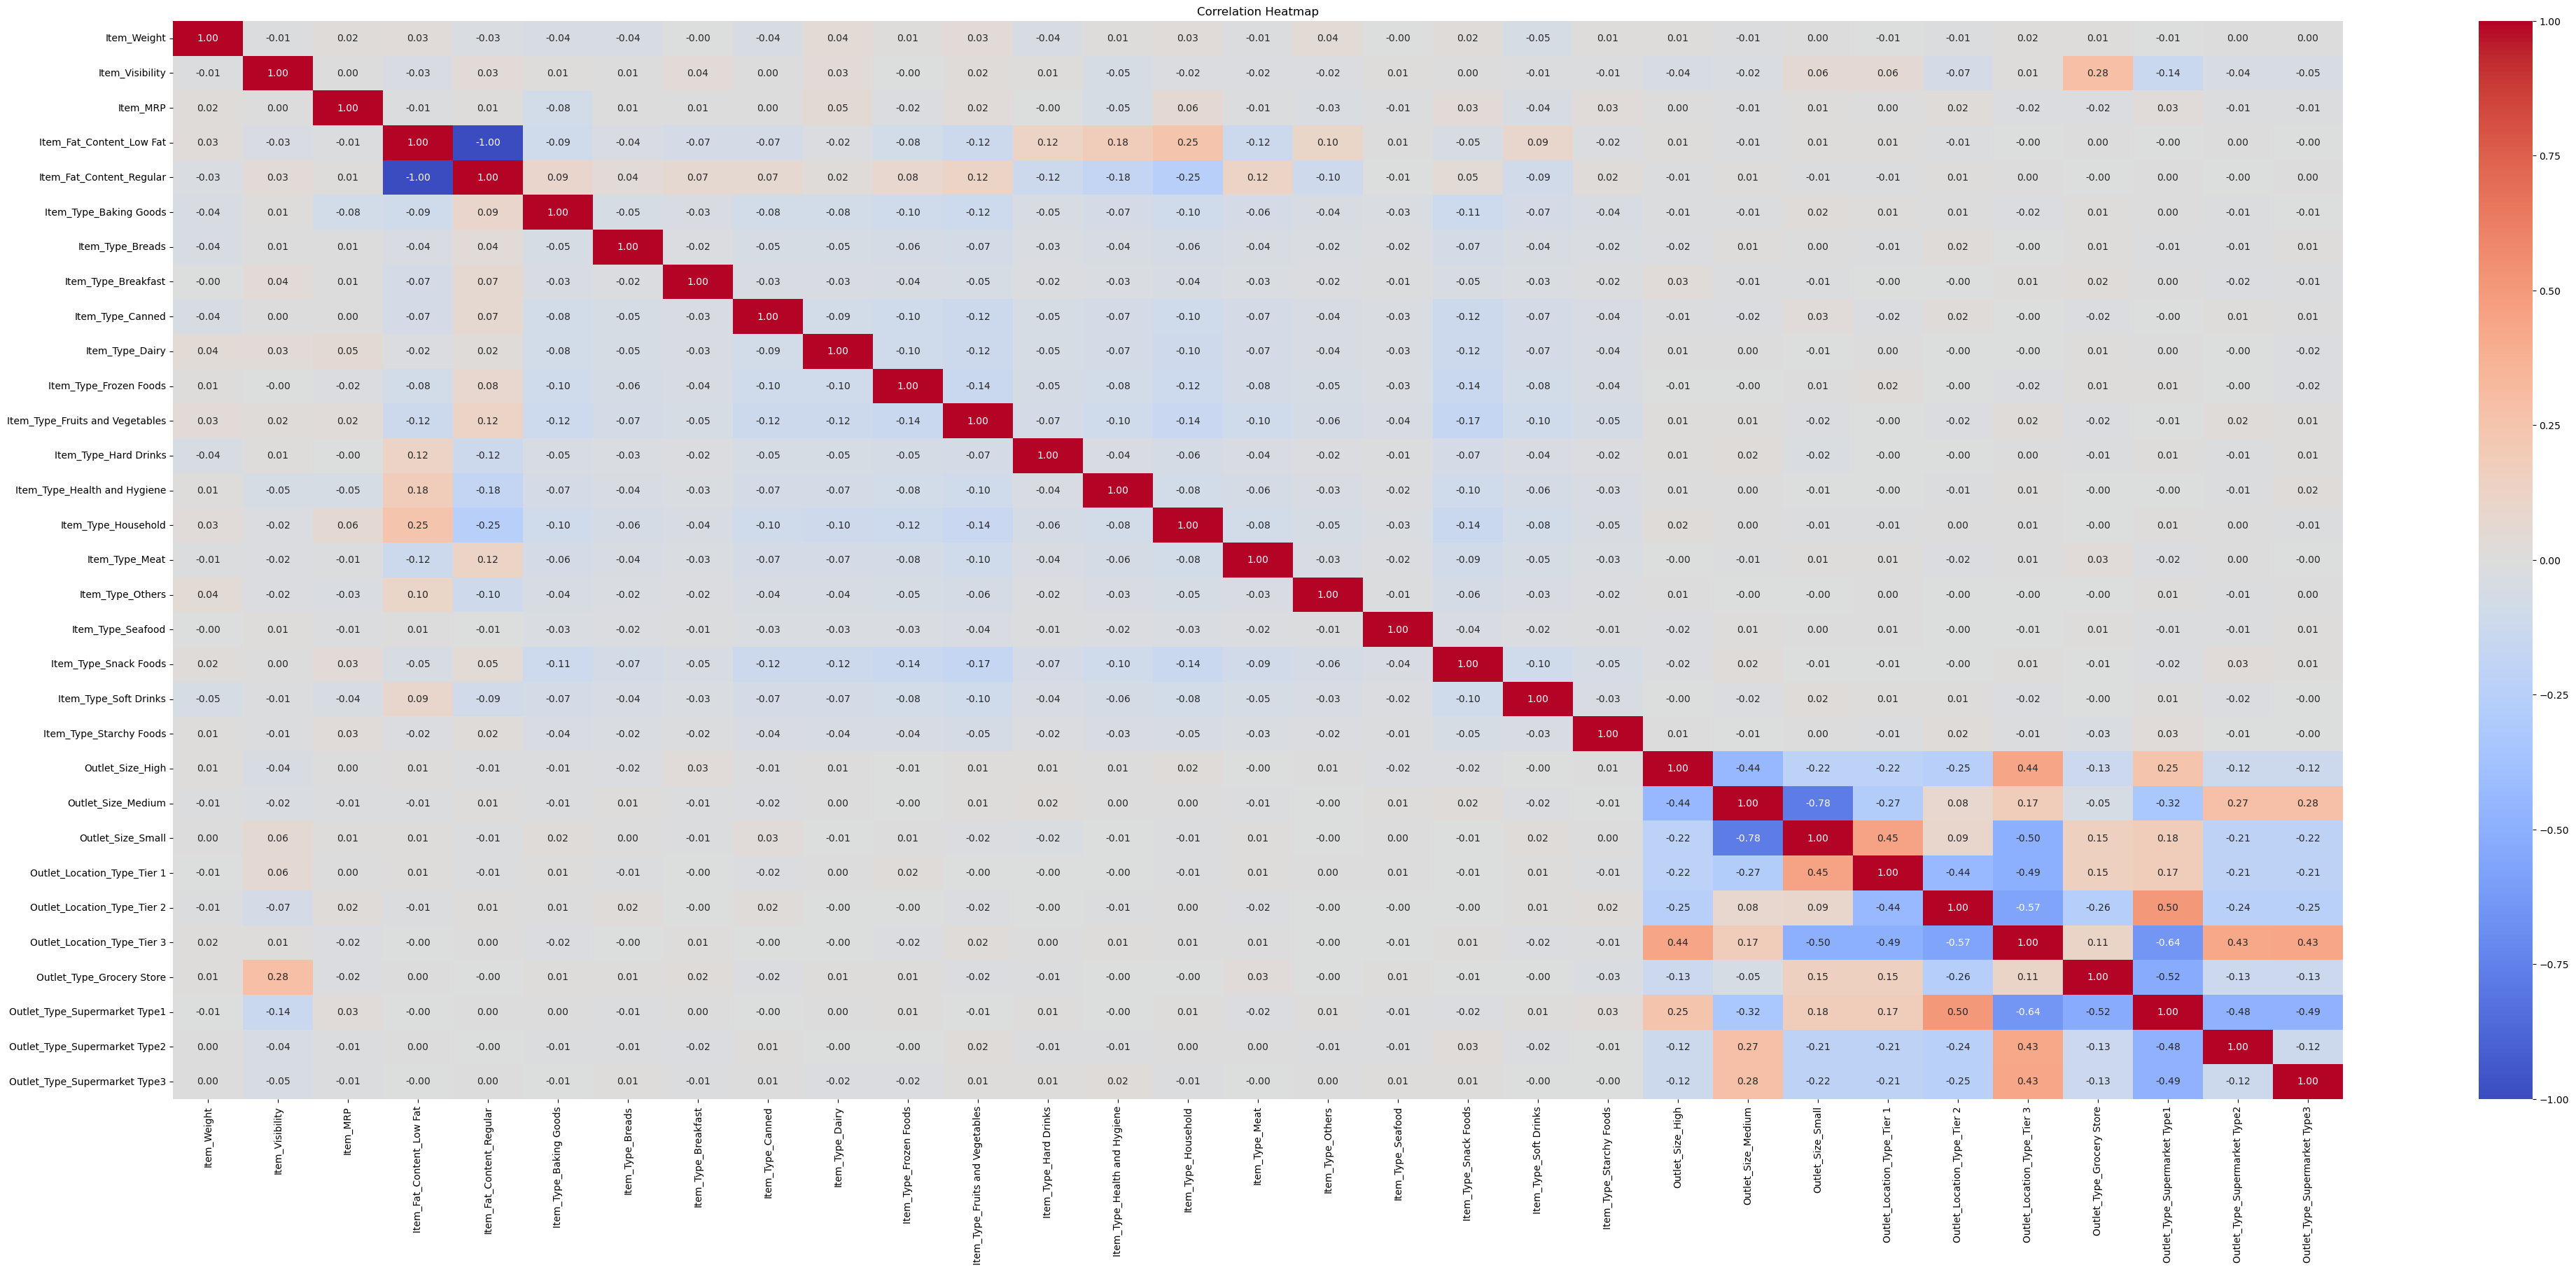

In [55]:
# Select features and target variable
X = df.drop('Item_Outlet_Sales', axis=1)

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X)

# Create a correlation matrix
correlation_matrix = X_encoded.corr()

# Set the threshold for correlation
threshold = 0.3  # You can adjust this threshold based on your requirements

# Find highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Print the highly correlated features
print("Highly Correlated Features:")
print(highly_correlated_features)

# # Create a heatmap
plt.figure(figsize=(50, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [60]:
# print the best features
print("The best features are:")
features = highly_correlated_features
print(features)


The best features are:
{'Item_Fat_Content_Regular', 'Outlet_Location_Type_Tier 1', 'Outlet_Size_Medium', 'Outlet_Type_Supermarket Type3', 'Outlet_Type_Supermarket Type2', 'Outlet_Size_Small', 'Outlet_Type_Supermarket Type1', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3'}


In [62]:
X_new = X_encoded[features]
y = df['Item_Outlet_Sales']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_49516/4025379680.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_new = X_encoded[features]


(((4000, 9), (4000,)), ((1000, 9), (1000,)))

In [63]:
import os
import time

def createModel(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate):
    model = Sequential()
    model.add(InputLayer(input_shape=(inputNeurons)))
    for i in range(numHiddLayers):
        model.add(Dense(units=numNeurons, activation='relu'))
    model.add(Dense(units=outputNeurons, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=learningRate), metrics=['mse'])
    return model

def createLogEntry(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, epochs, r2Score, mse, loss, batchSize, runTime):
    logEntry = pd.DataFrame([[inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, epochs, r2Score, mse, loss, batchSize, runTime]],
                            columns=['inputNeurons', 'outputNeurons', 'numHiddLayers', 'numNeurons', 'learningRate', 'epochs', 'r2Score', 'mse', 'loss', 'batchSize', 'runTime'])

    # save the log entry to CSV with header, and append new entries without rewriting the file, with only one header
    if not os.path.isfile('prob4_new_log.csv'):
        logEntry.to_csv('prob4_new_log.csv', index=False, header=True, mode='a')
    else:
        # Append without writing the header
        logEntry.to_csv('prob4_new_log.csv', index=False, header=False, mode='a')

    return logEntry

def fitModel(model, X_train, y_train, X_test, y_test, epochs, batchSize):
    model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batchSize)
    return model_history

def evaluateModel(model, X_test, y_test):
    loss, mse = model.evaluate(X_test, y_test)
    return loss, mse

def predictModel(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred

def calculateR2Score(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    return r2

def plotModelHistory(model_history):
    # summarize history for loss
    plt.plot(model_history.history['mse'])
    plt.plot(model_history.history['val_mse'])
    plt.title('model accuracy')
    plt.ylabel('mse')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

def runModel(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, epochs, batchSize):
    start_time = time.time()
    
    model = createModel(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate)
    model_history = fitModel(model, X_train, y_train, X_test, y_test, epochs, batchSize)
    loss, mse = evaluateModel(model, X_test, y_test)
    y_pred = predictModel(model, X_test)
    r2Score = calculateR2Score(y_test, y_pred)
    plotModelHistory(model_history)
    
    end_time = time.time()
    run_time = end_time - start_time
    
    return createLogEntry(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, epochs, r2Score, mse, loss, batchSize, run_time)



Epoch 1/100
500/500 [==============================] - 1s 2ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 2/100
500/500 [==============================] - 1s 1ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 3/100
500/500 [==============================] - 1s 1ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 4/100
500/500 [==============================] - 1s 1ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 5/100
500/500 [==============================] - 1s 1ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 6/100
500/500 [==============================] - 1s 1ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 7/100
500/500 [==============================] - 1s 1ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 8/100
500/500 [==============================] - 1s 1ms/step - 

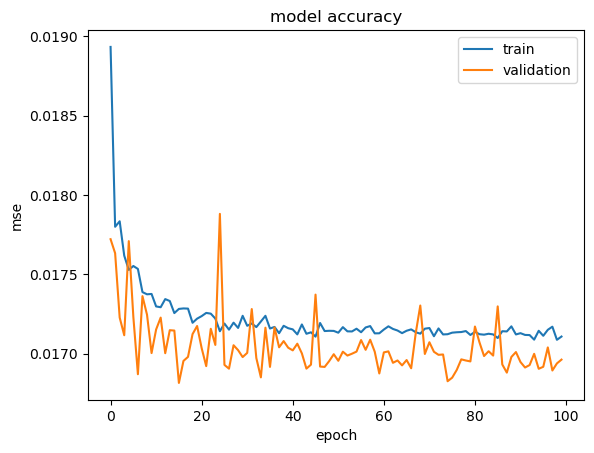

,inputNeurons,outputNeurons,numHiddLayers,numNeurons,learningRate,epochs,r2Score,mse,loss,batchSize,runTime
0,9,1,3,40,0.001,100,0.234863,0.016962,0.016962,8,67.644388


In [67]:
runModel(inputNeurons=X_train.shape[1], outputNeurons=1, numHiddLayers=3, numNeurons=40, learningRate=0.001, epochs=100, batchSize=8)